In [1]:
%load_ext autoreload
%autoreload 2

import nolearn.lasagne.visualize 

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline

Using gpu device 0: GeForce GTX TITAN (CNMeM is disabled, CuDNN 4007)
/home/d/nolearn/local/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [3]:
from stats import Stats

Loaded /home/d/patches//cylinder1/ in 0.00138592720032 seconds.
Using test set: ['image', 'prob', 'merged_array', 'border_overlap']

Precision/Recall:
             precision    recall  f1-score   support

          0       0.90      0.91      0.90     13408
          1       0.91      0.90      0.90     13408

avg / total       0.90      0.90      0.90     26816

Test Accuracy: 0.901886933174
Accuracy Score: 0.901886933174


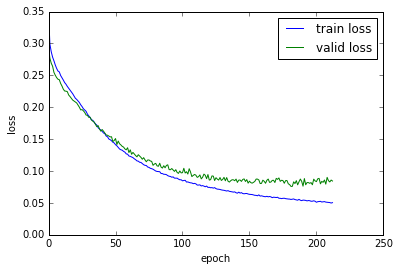

In [157]:
cnn1 = '/home/d/nets/MergeNet_cylinder1_larger_border_overlap_usevars/net.p'
cnn2 = '/home/d/nets/MergeNet_cylinder1_border_overlap_usevars/net.p'
cnn3 = '/home/d/nets/MergeNet_cylinder1_nooverlap_usevars/net.p'

cnn, loss_plot = Stats.load_cnn(cnn2)

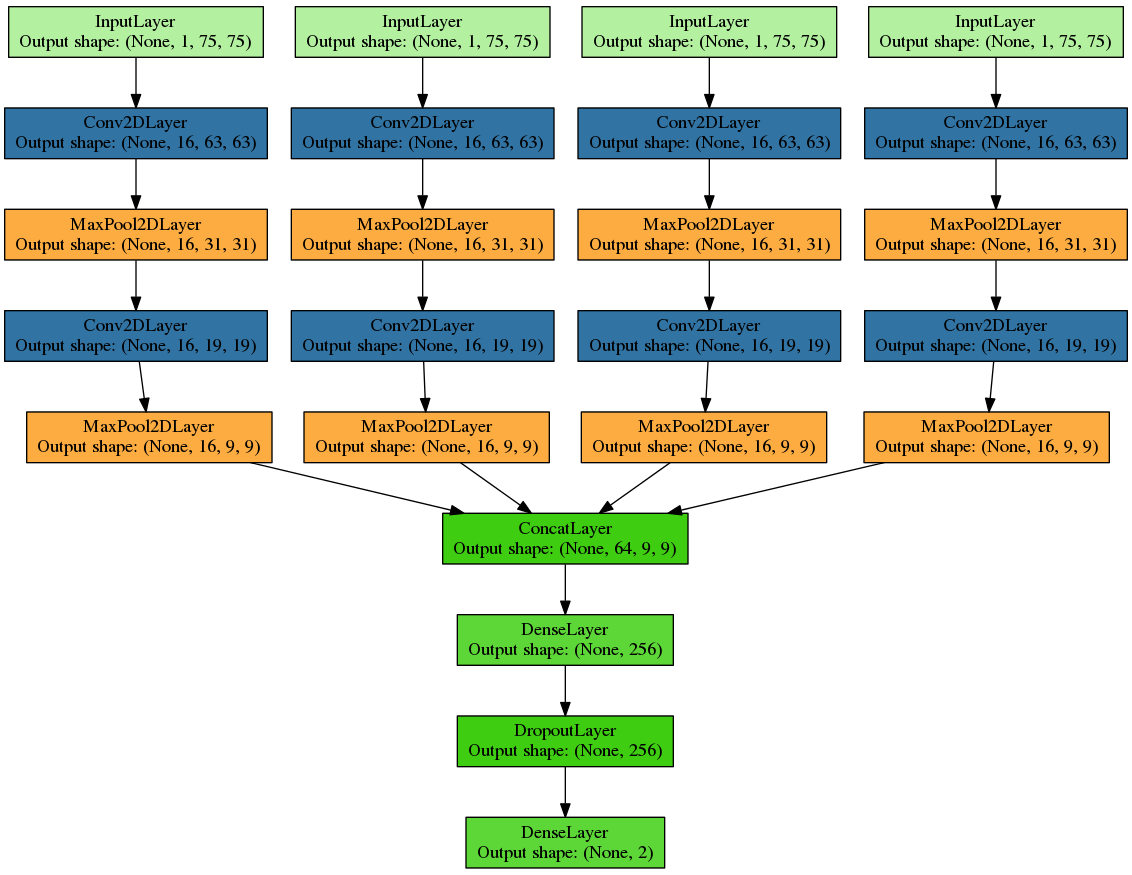

In [158]:
nolearn.lasagne.visualize.draw_to_notebook(cnn)

In [ ]:
me = Stats.run_dojo_xp(cnn)

Finding Top 5 merge errors..


In [115]:
me[0]

(0, 17, 0.0, [(0.0, array([[False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          ..., 
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False]], dtype=bool)),
  (0.0, array([[False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          ..., 
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False]], dtype=bool))])

In [25]:
import mlproof as mlp

In [98]:
    input_image, input_prob, input_gold, input_rhoana, dojo_bbox = mlp.Legacy.read_dojo_data()


In [29]:
a,b,c,d,e,f,g,h,i = mlp.Legacy.get_merge_error_image(input_image[0], input_rhoana[0], 17, me[0][3][0][1])        

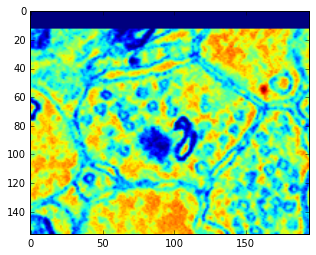

In [30]:
imshow(a)

In [72]:
f.max()

86

In [38]:
input_rhoana[0].max()

84

In [155]:
p = mlp.Patch.grab_group_test_and_unify(cnn, input_image[0], input_prob[0], f, 85,86)

{'prob_input': array([[[[-0.49215686, -0.49607843, -0.49607843, ...,  0.31176472,
          -0.10392156, -0.35882354],
         [-0.49607843, -0.5       , -0.5       , ...,  0.4137255 ,
           0.3392157 ,  0.17843139],
         [-0.5       , -0.5       , -0.5       , ...,  0.44901961,
           0.44509804,  0.42156863],
         ..., 
         [-0.18235293, -0.31960785, -0.43333334, ..., -0.5       ,
          -0.5       , -0.5       ],
         [-0.5       , -0.5       , -0.5       , ..., -0.49607843,
          -0.5       , -0.5       ],
         [-0.5       , -0.5       , -0.5       , ..., -0.5       ,
          -0.5       , -0.5       ]]]], dtype=float32), 'image_input': array([[[[ 0.06078434,  0.10000002,  0.10784316, ..., -0.1980392 ,
          -0.17450979, -0.10784313],
         [ 0.10784316,  0.08823532, -0.00588235, ..., -0.20980391,
          -0.20588234, -0.17058823],
         [ 0.127451  ,  0.05686277, -0.08431372, ..., -0.17450979,
          -0.21372548, -0.20196077],


In [141]:
import numpy as np
np.float

In [144]:
p

0.99999749660491943

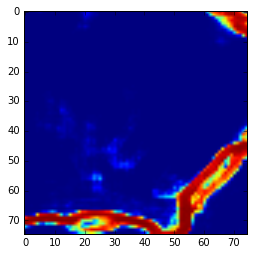

In [108]:
imshow(p[0]['prob'])

In [136]:
cnn.batch_iterator_test = MyTestBatchIterator(100)


In [145]:
from nolearn.lasagne import BatchIterator
class MyTestBatchIterator(BatchIterator):
    def transform(self, Xb, yb):
        
        # regularize the batch (which is already in the range 0..1)
        if isinstance(Xb, dict):
            # this is for our multi-leg CNN

            for k in Xb:
                Xb[k] = (Xb[k] - .5).astype(np.float32)

        else:

            Xb = Xb - .5
            
        return Xb, yb

In [119]:
cnn

NeuralNet(X_tensor_type=None, batch_iterator_test=None,
     batch_iterator_train=<mlproof.nets.helper.MyBatchIterator object at 0x7fe3a1806410>,
     binary_conv1_filter_size=(13, 13), binary_conv1_num_filters=16,
     binary_conv2_filter_size=(13, 13), binary_conv2_num_filters=16,
     binary_input_shape=(None, 1, 75, 75), binary_pool1_pool_size=(2, 2),
     binary_pool2_pool_size=(2, 2), border_conv1_filter_size=(13, 13),
     border_conv1_num_filters=16, border_conv2_filter_size=(13, 13),
     border_conv2_num_filters=16, border_input_shape=(None, 1, 75, 75),
     border_pool1_pool_size=(2, 2), border_pool2_pool_size=(2, 2),
     check_input=True, custom_scores=None, dropout3_p=0.5,
     hidden3_nonlinearity=<function rectify at 0x7fe3b403fb90>,
     hidden3_num_units=256, image_conv1_filter_size=(13, 13),
     image_conv1_num_filters=16, image_conv2_filter_size=(13, 13),
     image_conv2_num_filters=16, image_input_shape=(None, 1, 75, 75),
     image_pool1_pool_size=(2, 2), image_